## The Goodreads Data Visualization Project (Pandas, Matplotlib, Seaborn) <br> 
Written by: Niyousha Mohammadshafie <br>
Date:  July 2020

### Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data

In [2]:
df = pd.read_csv('../Goodreads/books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.shape

(11123, 12)

In [30]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


#### Columns Description:
- **bookID**: Unique ID of the books <br>
- **title**: Titles of the books<br>
- **authors**: Authors of the books<br>
- **average_rating**: The average rating of the books, as decided by the users<br>
- **isbn**: Specific information about the books - such as edition and publisher<br>
- **isbn13**: The new format for ISBN, implemented in 2007. 13 digits<br>
- **language_code**: Language of the books<br>
- **num_pages**: Number of pages for the books<br>
- **ratings_count**: Number of ratings given for the books<br>
- **text_reviews_count**: The count of reviews left by users
- **publication_date**: Date of the publication of the books
- **publisher**: Name of the publisher of the books

### Data Cleaning

In [5]:
books = df.copy() 

In [6]:
books.drop(['isbn','isbn13'],axis = 1,inplace=True) #dropping unnecessary data

In [7]:
#checking for missing data
columns = list(books.columns)
for col in columns:
    print(f'{col} : {pd.isnull(col)}')

bookID : False
title : False
authors : False
average_rating : False
language_code : False
  num_pages : False
ratings_count : False
text_reviews_count : False
publication_date : False
publisher : False


The data has no missing values. 

In [8]:
for col in columns:
    print(f'{col} : {books[col].dtypes}')

bookID : int64
title : object
authors : object
average_rating : float64
language_code : object
  num_pages : int64
ratings_count : int64
text_reviews_count : int64
publication_date : object
publisher : object


In [9]:
books['num_pages'] = books['  num_pages'] 

In [10]:
books['authors'] = books['authors'].apply(lambda x: x.split('/')[0])

The duplicated rows of the same books need to be removed.

In [11]:
books = books.sort_values(by = ['title', 'authors', 'ratings_count'])

In [12]:
#check for the repitative rows
books.drop_duplicates(subset=['title','authors'], keep = 'last', inplace = True)

In [13]:
books.shape

(10421, 11)

In [29]:
books['publication year'] = books['publication_date'].apply(lambda x: x.split('/')[2])
books['publication year'].astype('int64')

KeyError: 'publication_date'

In [15]:
books.drop(['publication_date'],axis = 1,inplace=True)

In [26]:
books = books.set_index('bookID')

### Exploratory Data Analysis

**Most Rated Books**

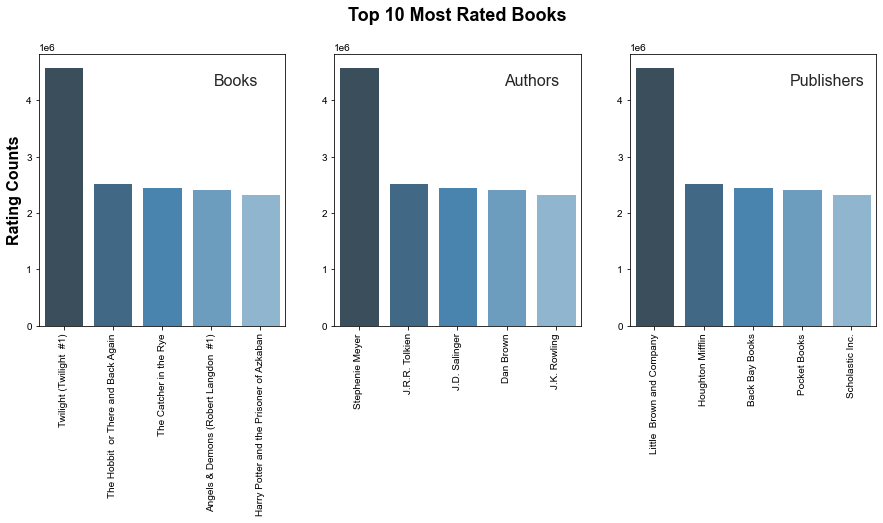

In [17]:
most_rated = books.sort_values(by = ['ratings_count'], ascending = False).head(5)

x1 = most_rated.title.str[:40]
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5))
sns.set_style("ticks")

sns.barplot(y = 'ratings_count', x = x1, 
            data = most_rated, palette = "Blues_d", ax = ax1)

sns.barplot(y = 'ratings_count', x = 'authors', 
            data = most_rated, palette = "Blues_d", ax = ax2)

sns.barplot(y = 'ratings_count', x = 'publisher', 
            data = most_rated, palette = "Blues_d", ax = ax3)


ax2.set_title('Top 10 Most Rated Books', weight = 'bold', fontsize = '18', y = 1.1)
ax1.set_xlabel('', weight = 'bold', fontsize = '16') 
ax2.set_xlabel('', weight = 'bold', fontsize = '16')
ax3.set_xlabel('', weight = 'bold', fontsize = '16')

ax1.set_ylabel('Rating Counts', weight = 'bold', fontsize = '16')
ax2.set_ylabel('', weight = 'bold', fontsize = '16')
ax3.set_ylabel('', weight = 'bold', fontsize = '16')
ax2.xaxis.set_label_coords(0.5, -0.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.text(0.8, 0.9, 'Books', fontsize=16, ha='center', va='center', transform=ax1.transAxes)
ax2.text(0.8, 0.9, 'Authors', fontsize=16, ha='center', va='center', transform=ax2.transAxes)
ax3.text(0.8, 0.9, 'Publishers', fontsize=16, ha='center', va='center', transform=ax3.transAxes)


plt.show()

**Longest Books** 

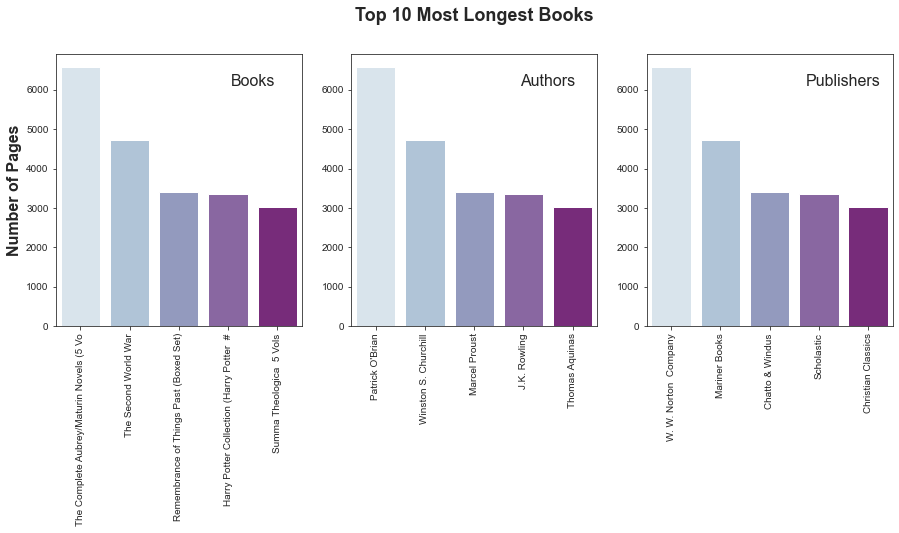

In [18]:
most_rated = books.sort_values(by = ['num_pages'], ascending = False).head(5)

x1 = most_rated.title.str[:40]
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(15,5))
sns.set_style("ticks")

sns.barplot(y = 'num_pages', x = x1, 
            data = most_rated, palette = "BuPu", ax = ax1)

sns.barplot(y = 'num_pages', x = 'authors', 
            data = most_rated, palette = "BuPu", ax = ax2)

sns.barplot(y = 'num_pages', x = 'publisher', 
            data = most_rated, palette = "BuPu", ax = ax3)


ax2.set_title('Top 10 Most Longest Books', weight = 'bold', fontsize = '18', y = 1.1)
ax1.set_xlabel('', weight = 'bold', fontsize = '16') 
ax2.set_xlabel('', weight = 'bold', fontsize = '16')
ax3.set_xlabel('', weight = 'bold', fontsize = '16')

ax1.set_ylabel('Number of Pages', weight = 'bold', fontsize = '16')
ax2.set_ylabel('', weight = 'bold', fontsize = '16')
ax3.set_ylabel('', weight = 'bold', fontsize = '16')
ax2.xaxis.set_label_coords(0.5, -0.5)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.text(0.8, 0.9, 'Books', fontsize=16, ha='center', va='center', transform=ax1.transAxes)
ax2.text(0.8, 0.9, 'Authors', fontsize=16, ha='center', va='center', transform=ax2.transAxes)
ax3.text(0.8, 0.9, 'Publishers', fontsize=16, ha='center', va='center', transform=ax3.transAxes)


plt.show()

**Rating & Review Distribution** 

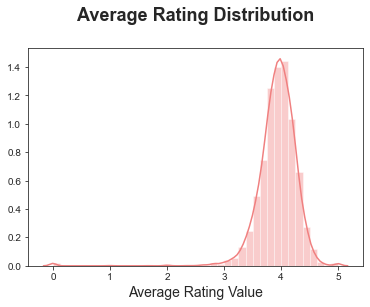

In [19]:
sns.distplot(books['average_rating'], hist = True, bins = 40, color = 'lightcoral')

plt.title('Average Rating Distribution', weight = 'bold', fontsize = '18', y = 1.1)
plt.xlabel('Average Rating Value', fontsize = '14')

plt.show()

**Correlation matrix & Heatmap**

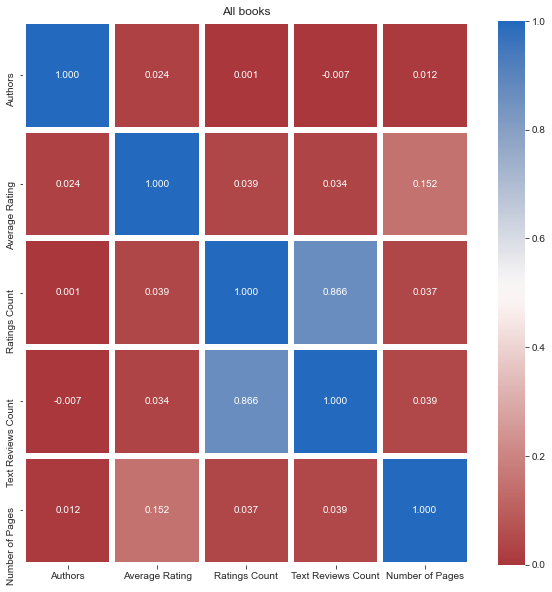

In [25]:
books['authors']=books['authors'].astype('category').cat.codes

labels=['Authors','Average Rating','Ratings Count', 'Text Reviews Count','Number of Pages']

f, ax1 = plt.subplots(figsize=(10,10))
# correlation heatmap
corr_df1 = books[['authors','average_rating','ratings_count','text_reviews_count','num_pages']].corr()
#corr_df2 = books[['authors','average_rating','ratings_count','text_reviews_count','num_pages']].head(100).corr()

sns.heatmap(corr_df1, annot=True, vmax=1, vmin = 0, fmt='.3f', cmap='vlag_r',ax = ax1, 
            linewidth=5,
            xticklabels=labels, yticklabels=labels)
#sns.heatmap(corr_df2, annot=True, vmax=1, vmin = 0, fmt='.3f', cmap='vlag_r',ax = ax2, 
            #linewidth=5,
            #xticklabels=labels, yticklabels=labels);
ax1.set_title('All books')

plt.show()